<a href="https://colab.research.google.com/github/sagar9926/Visualisations-/blob/master/PADHAI_Data_Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Tabulation

In [5]:
url = 'https://api.covid19india.org/states_daily.json'

In [6]:
import urllib.request

In [7]:
urllib.request.urlretrieve(url,'data.json')

('data.json', <http.client.HTTPMessage at 0x7fca6a260828>)

In [8]:
covid_data = pd.read_json('data.json')

In [9]:
covid_data

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
...,...
505,"{'an': '75', 'ap': '8976', 'ar': '45', 'as': '..."
506,"{'an': '2', 'ap': '82', 'ar': '0', 'as': '3', ..."
507,"{'an': '23', 'ap': '10603', 'ar': '157', 'as':..."
508,"{'an': '67', 'ap': '9067', 'ar': '68', 'as': '..."


In [10]:
import json

In [12]:
with open ('data.json') as f:
  data = json.load(f)
data = data['states_daily']

In [13]:
covid_data = pd.json_normalize(data)
covid_data.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [14]:
df = covid_data

In [15]:
df.date = pd.to_datetime(df.date)

In [16]:
df = df[df.status == "Confirmed"]

In [17]:
df.drop("status",axis = 1, inplace  = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df.set_index("date",inplace = True)

In [19]:
df.head()

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170 entries, 2020-03-14 to 2020-08-30
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      170 non-null    object
 1   ap      170 non-null    object
 2   ar      170 non-null    object
 3   as      170 non-null    object
 4   br      170 non-null    object
 5   ch      170 non-null    object
 6   ct      170 non-null    object
 7   dd      170 non-null    object
 8   dl      170 non-null    object
 9   dn      170 non-null    object
 10  ga      170 non-null    object
 11  gj      170 non-null    object
 12  hp      170 non-null    object
 13  hr      170 non-null    object
 14  jh      170 non-null    object
 15  jk      170 non-null    object
 16  ka      170 non-null    object
 17  kl      170 non-null    object
 18  la      170 non-null    object
 19  ld      170 non-null    object
 20  mh      170 non-null    object
 21  ml      170 non-null    object
 22  mn     

In [21]:
df = df.apply(pd.to_numeric)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170 entries, 2020-03-14 to 2020-08-30
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      170 non-null    int64
 1   ap      170 non-null    int64
 2   ar      170 non-null    int64
 3   as      170 non-null    int64
 4   br      170 non-null    int64
 5   ch      170 non-null    int64
 6   ct      170 non-null    int64
 7   dd      170 non-null    int64
 8   dl      170 non-null    int64
 9   dn      170 non-null    int64
 10  ga      170 non-null    int64
 11  gj      170 non-null    int64
 12  hp      170 non-null    int64
 13  hr      170 non-null    int64
 14  jh      170 non-null    int64
 15  jk      170 non-null    int64
 16  ka      170 non-null    int64
 17  kl      170 non-null    int64
 18  la      170 non-null    int64
 19  ld      170 non-null    int64
 20  mh      170 non-null    int64
 21  ml      170 non-null    int64
 22  mn      170 non-null    int64
 

In [23]:
df.tail(7)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24,44,8601,49,1879,1227,117,1136,0,1061,18,139,1067,100,1074,940,428,5851,1242,51,0,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,0,4601,405,2967
2020-08-25,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,78908,0,6175,664,3019


## Styling Tabulation

In [24]:
df = df.tail(7)

In [27]:
df.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,0,1061,18,139,1067,100,1074,940,428,5851,1242,51,0,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,0,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,78908,0,6175,664,3019


In [35]:
def color_red_negetive(x):
  color = 'red' if x < 0 else 'black'
  return 'color:' + color 

In [36]:
df.style.applymap(color_red_negetive)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,0,1061,18,139,1067,100,1074,940,428,5851,1242,51,0,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,0,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,78908,0,6175,664,3019


In [37]:
df.drop("un",inplace = True,axis = 1)

In [39]:
df.style.applymap(color_red_negetive)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,0,1061,18,139,1067,100,1074,940,428,5851,1242,51,0,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,78908,6175,664,3019


In [40]:
df.style.highlight_max(color = "red")

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,0,1061,18,139,1067,100,1074,940,428,5851,1242,51,0,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,78908,6175,664,3019


In [41]:
df.drop(["dd","ld"],axis = 1, inplace = True)

In [43]:
df.style.highlight_max(color = "red").highlight_min(color = "green")

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,78908,6175,664,3019


In [44]:
df.drop("tt",inplace = True,axis = 1)

In [47]:
def bold_max_value(x):
  is_max = (x == x.max())
  return['font-weight: bold' if y else '' for y in is_max]

In [48]:
df.style.apply(bold_max_value)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,6175,664,3019


In [49]:
df.style.apply(bold_max_value).highlight_min(color = "green")

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,6175,664,3019


In [51]:
df.style.apply(bold_max_value).highlight_max(color = "red",axis = 1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,6175,664,3019


In [52]:
df.style.background_gradient(cmap = "Reds")

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,6175,664,3019


In [53]:
df.style.background_gradient(cmap = "Reds", axis = 1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,6175,664,3019


In [54]:
df.style.bar()

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,6175,664,3019


In [55]:
df.style.bar(subset = ["mh","tn","dl"])

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,43,1450,0,2924,6495,447,6175,664,3019


In [56]:
df[["mh","tn","dl"]].style.bar()

,mh,tn,dl
date,,,
2020-08-24 00:00:00,11015,5967,1061
2020-08-25 00:00:00,10425,5951,1544
2020-08-26 00:00:00,14888,5958,1693
2020-08-27 00:00:00,14857,5981,1840
2020-08-28 00:00:00,14427,5996,1808
2020-08-29 00:00:00,16286,6352,1954
2020-08-30 00:00:00,16408,6495,2024


In [57]:
df[["mh","tn","dl"]].style.bar(subset = ["mh"] , color = "red").bar(subset = ["tn"] , color = "green").bar(subset = ["dl"] , color = "yellow")

,mh,tn,dl
date,,,
2020-08-24 00:00:00,11015,5967,1061
2020-08-25 00:00:00,10425,5951,1544
2020-08-26 00:00:00,14888,5958,1693
2020-08-27 00:00:00,14857,5981,1840
2020-08-28 00:00:00,14427,5996,1808
2020-08-29 00:00:00,16286,6352,1954
2020-08-30 00:00:00,16408,6495,2024


# Distribution of data 

## Distribution of Continuous Variable 


### Histogram

In [64]:
x = np.random.normal(size  = 1000)
sns.set(color_codes = True)

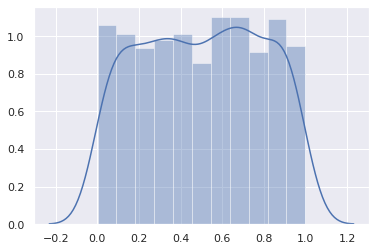

In [101]:
sns.distplot(x);

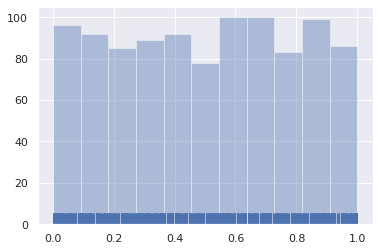

In [102]:
sns.distplot(x , kde = False , rug = True);

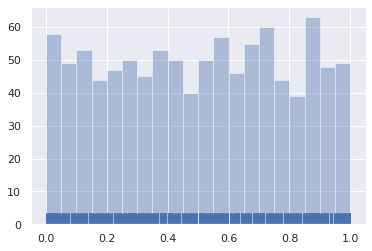

In [103]:
sns.distplot(x , kde = False , rug = True,bins = 20);

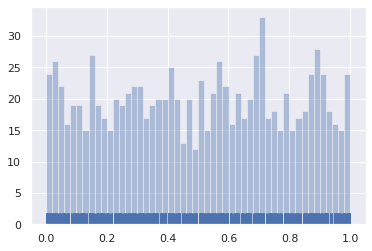

In [104]:
sns.distplot(x , kde = False , rug = True,bins = 50);

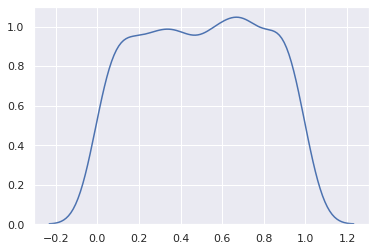

In [105]:
sns.kdeplot(x);

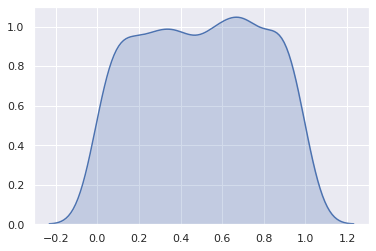

In [106]:
sns.kdeplot(x,shade = True);

In [107]:
y = np.random.uniform(size = 1000)

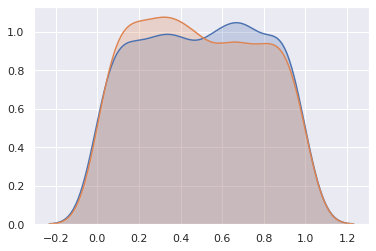

In [108]:
sns.kdeplot(x,shade = True);
sns.kdeplot(y,shade = True);

In [109]:
d = sns.load_dataset('diamonds')

In [110]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [111]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


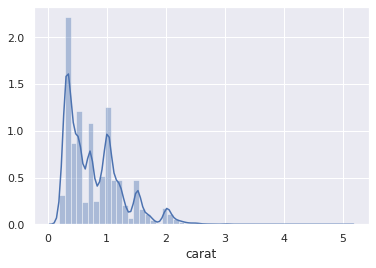

In [112]:
sns.distplot(d.carat);

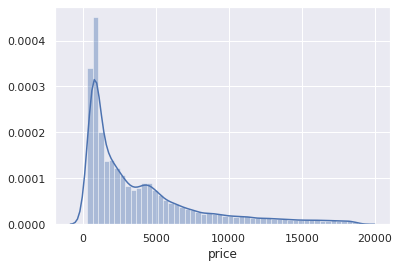

In [113]:
sns.distplot(d.price);

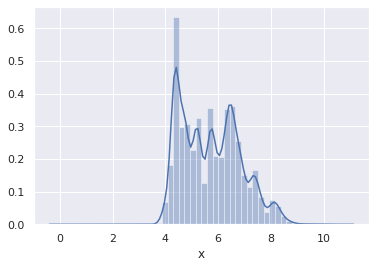

In [114]:
sns.distplot(d.x);

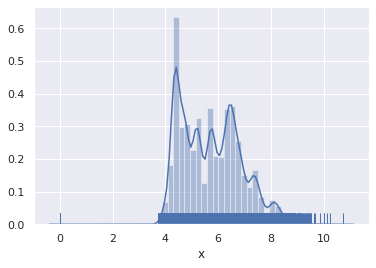

In [115]:
sns.distplot(d.x, rug = True);

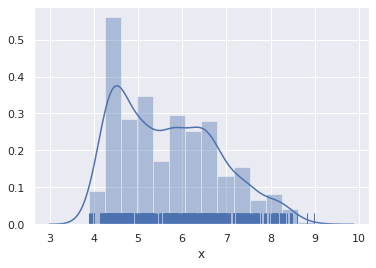

In [116]:
sns.distplot(d.sample(1000).x, rug = True);

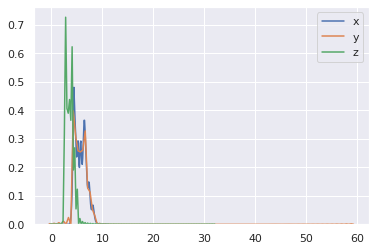

In [117]:
sns.kdeplot(d.x);
sns.kdeplot(d.y);
sns.kdeplot(d.z);

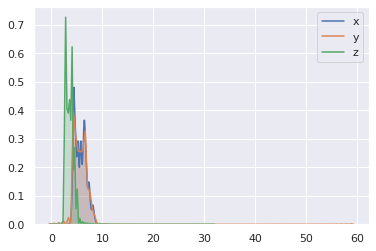

In [118]:
sns.kdeplot(d.x, shade = True);
sns.kdeplot(d.y, shade = True);
sns.kdeplot(d.z, shade = True);

### Box Plot

In [119]:
x = np.random.normal(size = 1000)

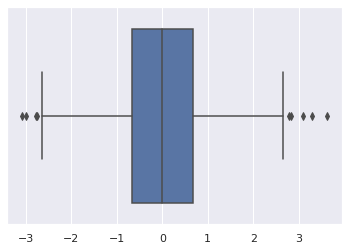

In [120]:
sns.boxplot(x)

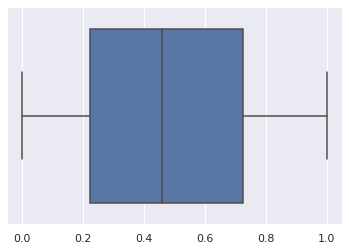

In [121]:
x = np.random.uniform(size = 1000)
sns.boxplot(x);

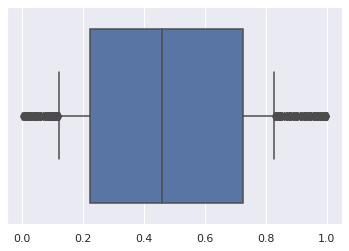

In [122]:
sns.boxplot(x,whis = 0.2);

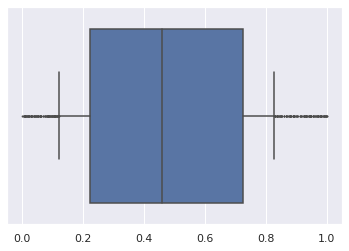

In [123]:
sns.boxplot(x,whis = 0.2,fliersize = 1);

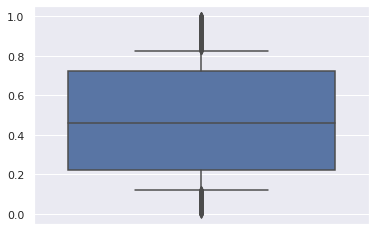

In [124]:
sns.boxplot(x,whis = 0.2,orient = "v");

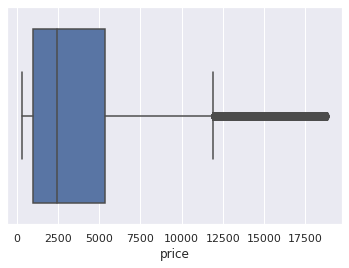

In [125]:
sns.boxplot(d.price);

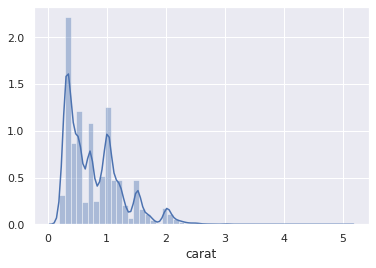

In [126]:
sns.distplot(d.carat)

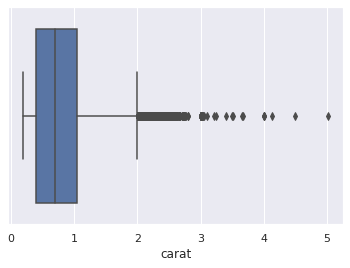

In [127]:
sns.boxplot(d.carat)

## Distribution of categorical variables

### Bar plots

In [131]:
c  = d.groupby('cut')['cut'].count()

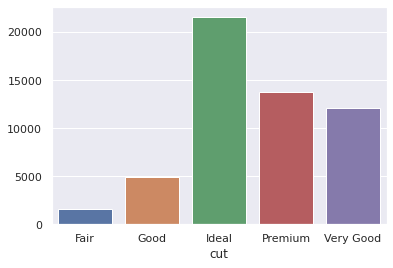

In [133]:
sns.barplot(x = c.index,y  = c.values);

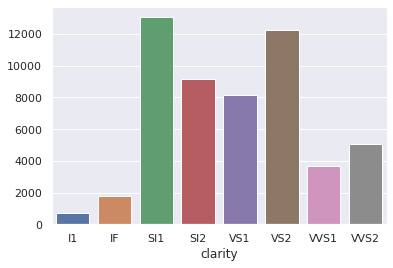

In [134]:
c  = d.groupby('clarity')['clarity'].count()
sns.barplot(x = c.index,y  = c.values);


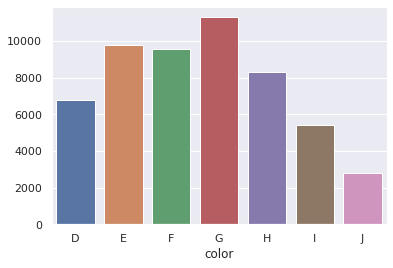

In [135]:
c  = d.groupby('color')['color'].count()
sns.barplot(x = c.index,y  = c.values);


## Joint distribution of two variables

### Jointplot

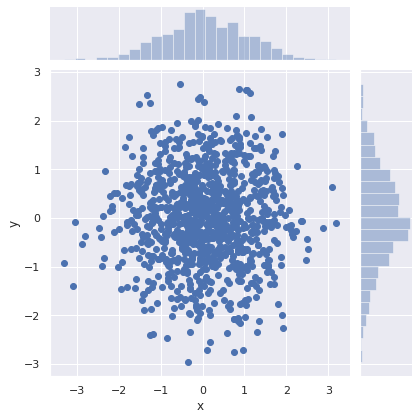

In [142]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

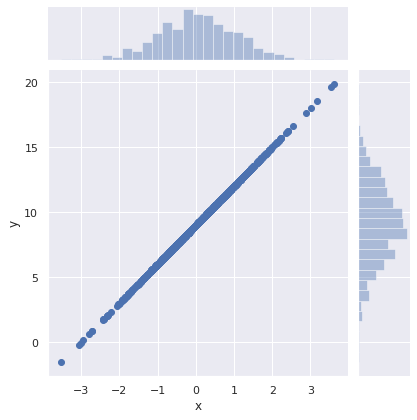

In [140]:
x = np.random.normal(size = 1000)
y = 3*x + 9 
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

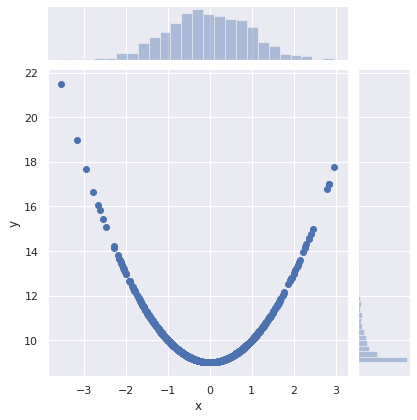

In [141]:
x = np.random.normal(size = 1000)
y = x**2 + 9 
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

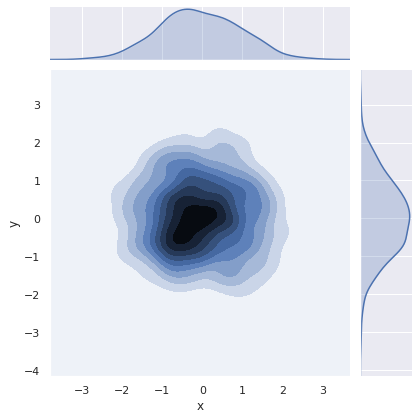

In [143]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

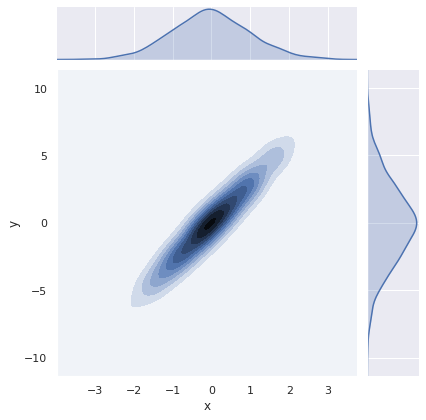

In [145]:
x = np.random.normal(size = 1000)
y = 3*x + np.random.normal(size = 1000)/5
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

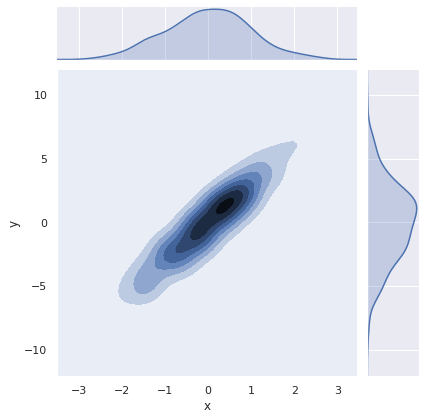

In [146]:
x = np.random.normal(size = 1000)
y = 3*x + np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

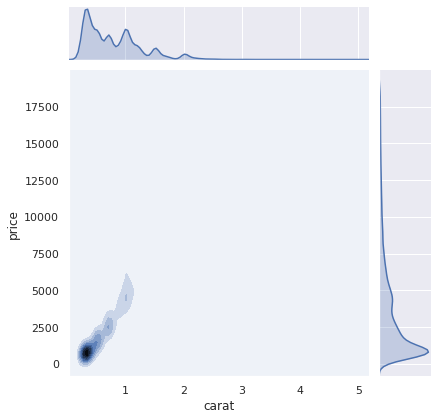

In [147]:
sns.jointplot("carat","price",data = d, kind = 'kde')

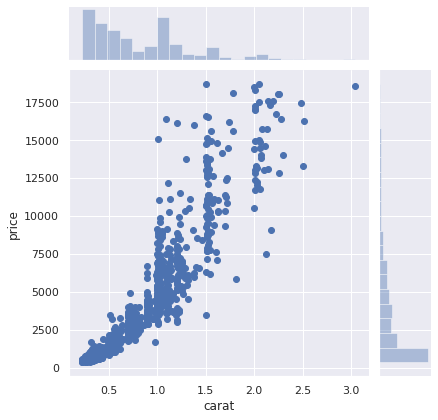

In [148]:
sns.jointplot("carat","price",data = d.sample(1000))

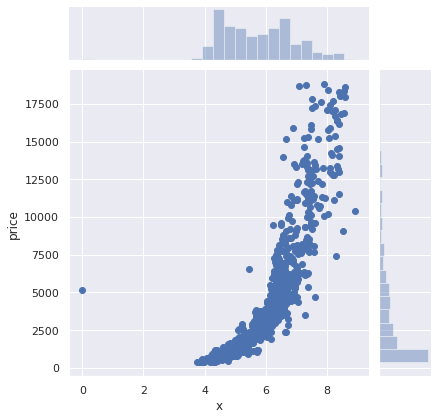

In [149]:
sns.jointplot("x","price",data = d.sample(1000))

### Swarm plot

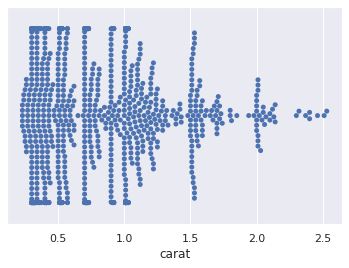

In [151]:
sns.swarmplot(d.sample(1000).carat)

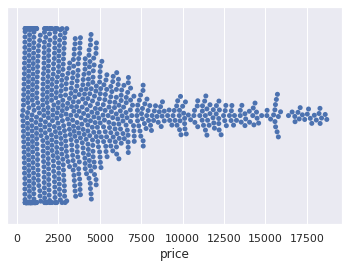

In [152]:
sns.swarmplot(d.sample(1000).price);

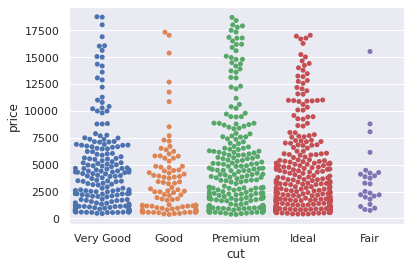

In [154]:
sns.swarmplot(x = 'cut', y = 'price', data = d.sample(1000))

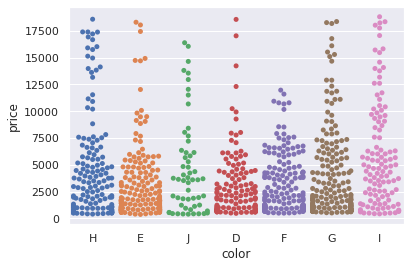

In [155]:
sns.swarmplot(x = 'color', y = 'price', data = d.sample(1000))

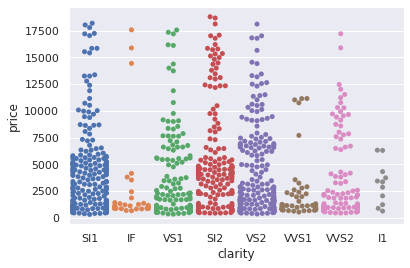

In [156]:
sns.swarmplot(x = 'clarity', y = 'price', data = d.sample(1000))

In [157]:
p = sns.load_dataset('penguins')

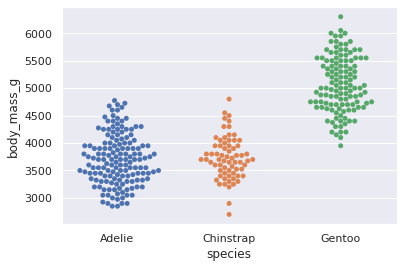

In [158]:
sns.swarmplot(x = 'species',y = "body_mass_g", data = p)

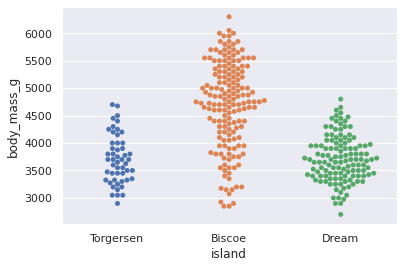

In [159]:
sns.swarmplot(x = 'island',y = "body_mass_g", data = p)

### Violin plot

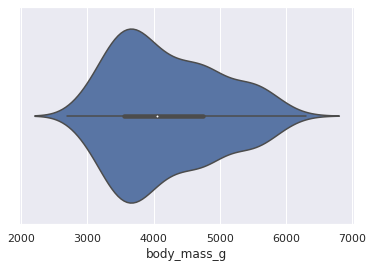

In [160]:
sns.violinplot(x = 'body_mass_g', data = p)

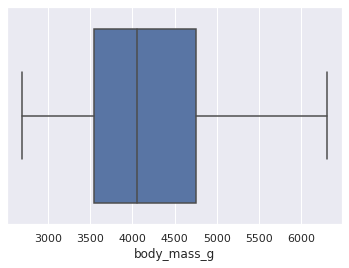

In [161]:
sns.boxplot(x = 'body_mass_g', data = p)

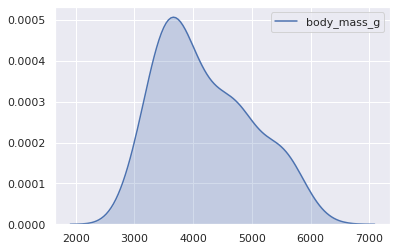

In [163]:
sns.kdeplot(p.body_mass_g , shade = True)

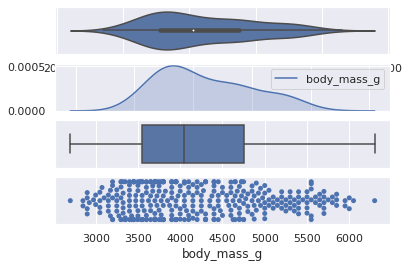

In [165]:
fig , axs  = plt.subplots(nrows = 4)
sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);

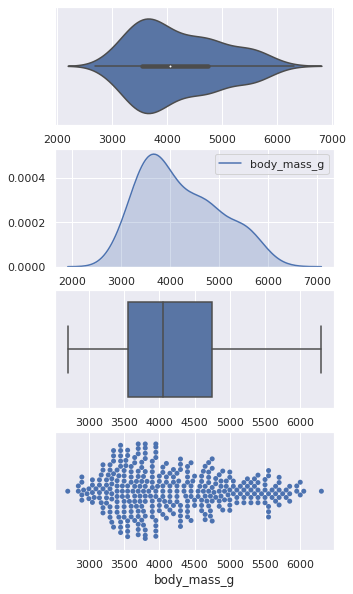

In [166]:
fig , axs  = plt.subplots(nrows = 4)
fig.set_size_inches(5,10)
sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);

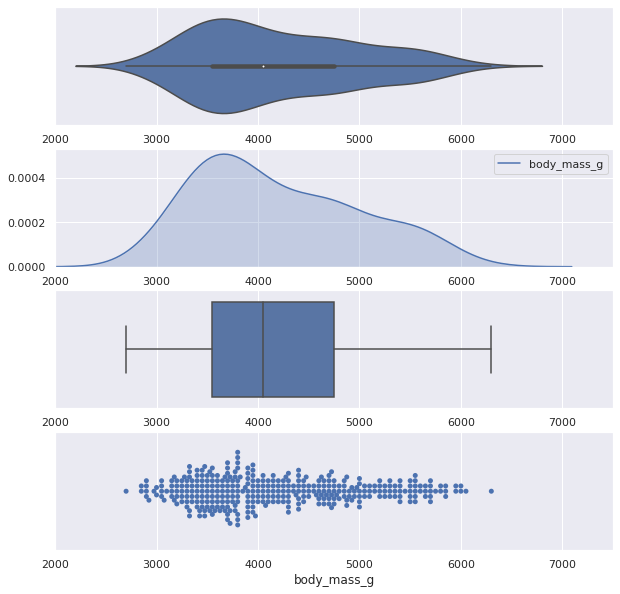

In [168]:
fig , axs  = plt.subplots(nrows = 4)
fig.set_size_inches(10,10)
p1 = sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
p1.set(xlim = (2000,7500));

p2 = sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
p2.set(xlim = (2000,7500));

p3 = sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
p3.set(xlim = (2000,7500));

p4 = sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);
p4.set(xlim = (2000,7500));


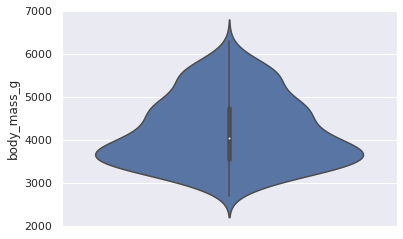

In [170]:
sns.violinplot(x = 'body_mass_g', data = p, orient = 'v');

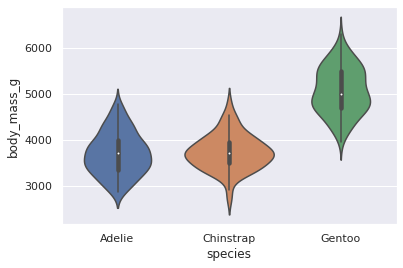

In [171]:
sns.violinplot(x = 'species', y = 'body_mass_g', data = p);

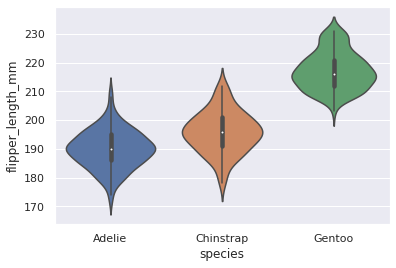

In [172]:
sns.violinplot(x = 'species', y = 'flipper_length_mm', data = p);

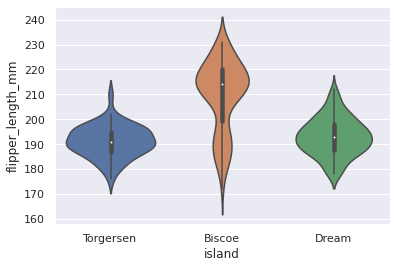

In [173]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p);

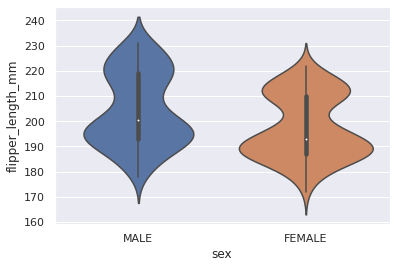

In [174]:
sns.violinplot(x = 'sex', y = 'flipper_length_mm', data = p);

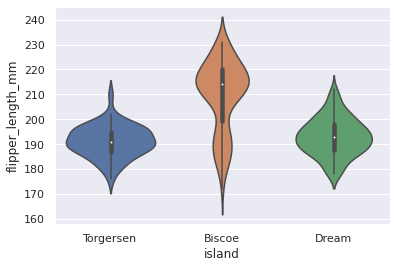

In [175]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p);

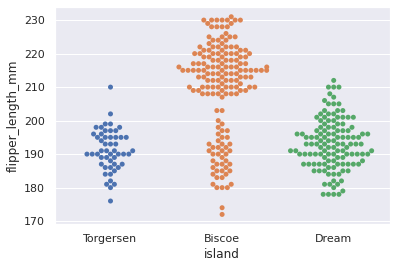

In [179]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p);

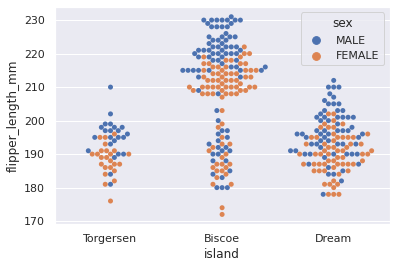

In [178]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p , hue = 'sex');

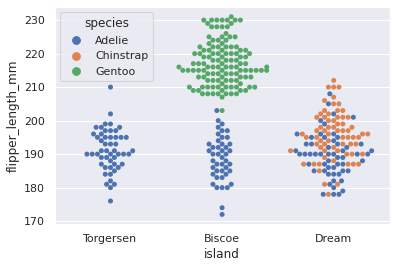

In [180]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p , hue = 'species');

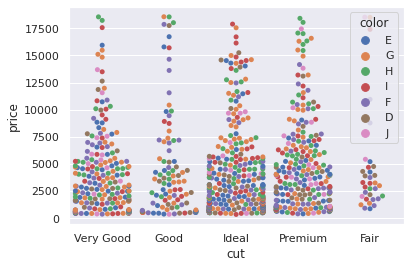

In [182]:
sns.swarmplot(x = 'cut', y = 'price', data = d.sample(1000), hue = 'color');